In [1]:
%run plocice.ipynb


<Figure size 2000x10000 with 11 Axes>

<Figure size 640x480 with 1 Axes>

36


<Figure size 640x480 with 1 Axes>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


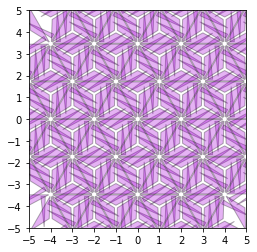

In [45]:
#pol = Polygon([(0.25,0.1),(0.45, 0.1), (0.45,1), (0.25,1)])
pol = Polygon([(0.25,0.1),(0.45, 0.1), (0.3,1.5)])

tr = Polygon([(0.1,0.02),(1.9, 0.02), (1,0.5)])
xmin,xmax,ymin,ymax = (-5,5,-5,5)
okvir = [-5,5,-5,5]
bx = plt.axes()  
bx.set_xlim(xmin,xmax)
bx.set_xticks(range(xmin,xmax+1))
bx.set_ylim(ymin,ymax)
bx.set_yticks(range(ymin,ymax+1))
bx.set_aspect(1)
crtaj(izomgen_p6,pol,bx)
crtaj(izomgen_p6,tr,bx)

plt.show()

In [47]:
slike = generisi_pol(izomgen_p6,pol)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


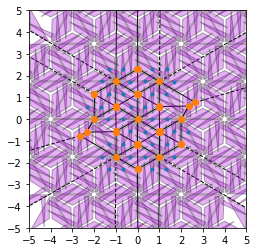

In [48]:
sl = []
x0,y0 = s.exterior.coords[0]

#sl.append([x0,y0])
pol_n=0


for s in slike:
    sl.append([s.centroid.x,s.centroid.y])

n = pol_n/len(slike)          

len(tacke0)
vor = Voronoi(sl)
fig = voronoi_plot_2d(vor)

ax = plt.axes()  
ax.set_xlim(xmin,xmax)
ax.set_xticks(range(xmin,xmax+1))
ax.set_ylim(ymin,ymax)
ax.set_yticks(range(ymin,ymax+1))
ax.set_aspect(1)
crtaj(izomgen_p6,tr,ax) 
crtaj(izomgen_p6,pol,ax)
plt.show()


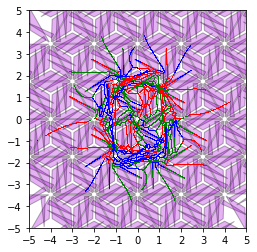

In [49]:
sl_1 = []
x0,y0 = slike[0].exterior.coords[0]
sl_1.append([x0,y0])
pol_n=0
d=100
for s in slike:
    for i in range(1, len(s.exterior.coords)):
        x1,y1= s.exterior.coords[i]
        for p in np.arange(0,1,1.0/d):           
            x = p*x1 + (1-p)*x0
            y = p*y1 + (1-p)*y0
            sl_1.append([x,y])
        sl_1.append([x1,y1])
        x0,y0=x1,y1
n = d*(len(slike[0].exterior.coords)-1)
vor_1 = Voronoi(sl_1)
v_1 = vor_1.vertices
ploc=[0]*len(slike)
ax = plt.axes()  
ax.set_xlim(xmin,xmax)
ax.set_xticks(range(xmin,xmax+1))
ax.set_ylim(ymin,ymax)
ax.set_yticks(range(ymin,ymax+1))
ax.set_aspect(1)
crtaj(izomgen_p6,tr,ax) 
crtaj(izomgen_p6,pol,ax)
for j in range(len(slike)):
    for i in range(n):
        ploc[j] = np.union1d(ploc[j],vor_1.regions[vor_1.point_region[n*j+i]])

for k in range(10):
    plt.plot([v_1[int(i)][0] for i in ploc[3*k]],[v_1[int(i)][1] for i in ploc[3*k]], 'r,')
    plt.plot([v_1[int(i)][0] for i in ploc[3*k+1]],[v_1[int(i)][1] for i in ploc[3*k+1]], 'g,')
    plt.plot([v_1[int(i)][0] for i in ploc[3*k+2]],[v_1[int(i)][1] for i in ploc[3*k+2]], 'b,')
#plt.plot([v_1[int(i)][0] for i in ploc[2]],[v_1[int(i)][1] for i in ploc[2]], 'g,')
#plt.plot([v_1[int(i)][0] for i in ploc[5]],[v_1[int(i)][1] for i in ploc[5]], 'b,')
